# Machine Learning

**Resampling - Cross validation**

Prof. Neylson Crepalde

Ester Pereira Martins

# Algoritmo de força bruta  

*IMP*


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import LeaveOneOut, KFold, train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, roc_auc_score

In [2]:
bd = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
bd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
bd.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
bd.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
bd.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
67     12
105    12
70     12
65     10
97      9
85      9
80      7
140     7
145     7
72      6
78      6
68      6
84      6
92      6
170     5
115     5
71      5
180     5
86      5
130     5
?       5
60      5
175     5
       ..
64      1
167     1
230     1
133     1
89      1
152     1
208     1
54      1
77      1
94      1
91      1
135     1
210     1
93      1
132     1
220     1
66      1
122     1
137     1
103     1
113     1
82      1
107     1
148     1
49      1
193     1
108     1
116     1
149     1
142     1
Name: horsepower, Length: 94, dtype: int64

In [6]:
bd.loc[bd["horsepower"] == "?", "horsepower"] = np.nan
bd = bd.dropna()
bd.horsepower = bd.horsepower.astype("float64")
bd.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [0]:
y = bd.mpg
x = bd.horsepower
y = np.array(y)
x = np.array(x)
x = x.reshape(-1,1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 5) # split = gera números aleatórios
reg = LinearRegression()
reg.fit(x_train, y_train)
yhat = reg.predict(x_test)
medida = mean_squared_error(y_test, yhat)
print("MSE for Simple Linear Regression", medida)

MSE for Simple Linear Regression 34.61244348009658


***Estimando o MSE da regressão com LOOCV***

In [10]:
loo = LeaveOneOut()

mse_list = []

for train, test in loo.split(x):
  x_train, x_test = x[train], x[test]
  y_train, y_test = y[train], y[test]
  reg.fit(x_train, y_train)
  yhat = reg.predict(x_test)
  medida = mean_squared_error(y_test, yhat)
  mse_list.append(medida)
  
print(mse_list)
mse_array = np.array(mse_list)

[2.0200100243216412, 1.2509241240422861, 3.0680516401639832, 0.06799019837204447, 0.7082556294244434, 41.35667450716614, 81.37553579730985, 67.14947672916045, 97.0498846570756, 26.343036823043395, 3.6742869739717334, 0.47074169056782245, 1.6050778867388114, 97.0498846570756, 0.889557151130716, 8.69418109789263, 44.12289653365883, 30.656222509959473, 0.9165497318131822, 45.31853784962301, 1.457052807537722, 3.0098355440288405, 0.0035461760456729618, 15.29640877266284, 22.502220796825593, 16.79054457227355, 2.7673535145602908, 18.535464818187215, 0.22995747384892581, 0.9165497318131822, 5.183799994543558, 0.0035461760456725385, 26.674551027218364, 54.47911198315076, 51.407832368845995, 49.94052560583025, 38.03600056861017, 0.011988458474187537, 2.9103300297208614, 3.2310436344767135, 5.166911181280724, 0.23248733238398803, 0.010667890815345995, 0.48261526388764725, 21.021111412644863, 43.558519729146084, 26.674551027218364, 65.12311616023943, 11.369041835374313, 5.183799994543558, 1.2508

In [11]:
print("MSE with LOOCV:", mse_array.mean())

MSE with LOOCV: 24.231513517929226


In [12]:
kf10 = KFold(10)

mse_list = []
for train, test in kf10.split(bd):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    reg.fit(x_train, y_train)
    yhat = reg.predict(x_test)
    measure = mean_squared_error(y_test, yhat)
    mse_list.append(measure)

mse_array = np.array(mse_list)
print(len(mse_array))
print("MSE with 5-Fold CV: " ,mse_array.mean())

10
MSE with 5-Fold CV:  27.439933652339874


*Estimando o polinômio ideal*


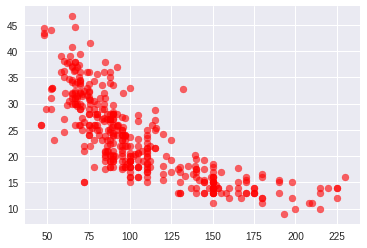

In [13]:
plt.scatter(x=bd.horsepower, y=bd.mpg, color="red", alpha=.6)
plt.show()

In [14]:
x_list = [x]

for i in range (2,11):
  poly = PolynomialFeatures(i)
  new = poly.fit_transform(x)
  x_list.append(new)
  
len(x_list)  

10

In [15]:
kf10 = KFold(10)

mse_list = []

for i, (train, test) in enumerate(kf10.split(bd)):
  x_train, x_test = x_list[i][train], x_list[i][test]
  y_train, y_test = y[train], y[test]
  reg.fit(x_train, y_train)
  yhat = reg.predict(x_test)
  medida = mean_squared_error(y_test, yhat)
  mse_list.append(medida)
  
print(len(mse_list))
print(mse_list)

10
[28.347835840972245, 16.55513797223718, 19.976595572221957, 21.775113683003745, 13.003991122443246, 10.82388180760425, 11.879517003719084, 20.408014892919084, 49.80978123230409, 35.838837191072564]


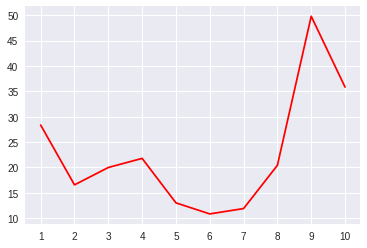

In [17]:
plt.plot(mse_list, color="red")
plt.xticks(range(10), range(1,11))
plt.show()

In [20]:
mse_test = []
mse_train = []

for i, (train, test) in enumerate(kf10.split(bd)):
  x_train, x_test = x_list[i][train], x_list[i][test]
  y_train, y_test = y[train], y[test]
  reg.fit(x_train, y_train)
  yhat_teste = reg.predict(x_test)
  yhat_treino = reg.predict(x_train)
  medida_teste = mean_squared_error(y_test, yhat_teste)
  medida_treino = mean_squared_error(y_train, yhat_treino)
  mse_test.append(medida_teste)
  mse_train.append(medida_treino)
  
print(len(mse_test))
print(len(mse_train))

10
10


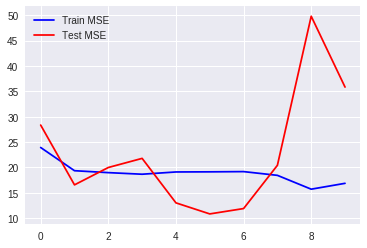

In [22]:
fig, ax = plt.subplots()
ax.plot(mse_train, color="blue", label="Train MSE")
ax.plot(mse_test, color="red", label="Test MSE")
ax.legend()
plt.show()

*Bootstrap*

In [0]:
from sklearn.utils import resample

In [36]:
# Configurando o bootstrap
n_iterations = 1000
n_size = bd.shape[0]

# Executar o bootstrap
mse_list = []
for i in range(n_iterations): 
  x_re, y_re = resample(x, y, replace = True, n_samples = n_size)
  x_train, x_test, y_train, y_test = train_test_split(x_re, y_re, test_size=0.3)
  reg.fit(x_train, y_train)
  yhat_boot = reg.predict(x_test)
  mdedida = mean_squared_error(y_test, yhat_boot)
  mse_list.append(medida)
  
print(len(mse_list))  

##### dúvida ?????? 

1000


In [37]:
np.mean(mse_list)

35.838837191072564

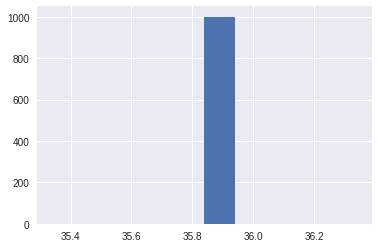

In [35]:
plt.hist(mse_list)
plt.show()

In [32]:
# Função para calcular o erro padrão
def stderr(x):
    n = len(x)
    return np.std(x) / np.sqrt(n)
  
# Função para calcular o intervalo de confiança
def confint95(x):
    err = stderr(x)
    up = np.mean(x) + 1.96*err
    low = np.mean(x) - 1.96*err
    return np.array([low, up])

print("Erro padrão da média de MSE: ", stderr(mse_list))
print("Intervalo de confiança do MSE: ", confint95(mse_list))

Erro padrão da média de MSE:  0.0
Intervalo de confiança do MSE:  [35.83883719 35.83883719]
